In [1]:
import os
# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import train_test_split function
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import classification_report
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import precision_recall_fscore_support

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

import seaborn as sns

from sklearn.inspection import permutation_importance


#Import svm model
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler  ##Support Vector Machine algorithms are not scale invariant,

#from SSD import *
##so it is highly recommended to scale your data

from sklearn.tree import export_graphviz

# Convert to png using system command (requires Graphviz)
from subprocess import call

# Display in jupyter notebook
from IPython.display import Image

import warnings

warnings.filterwarnings('ignore')

In [2]:
paths = r'E:\Prasad\IITM\AHRAE-D-RP-1312-EXCEL DATA\Experiment\Fault test\2007summer_added_data'

filess = sorted(glob.glob(paths + '/*.xls'))

fs = [0,1,2,3,4,5,15,7,8,12,14,18,19,20]
dfs = pd.DataFrame()

for f in fs:
    datas = pd.read_excel(filess[f], 'A')
    dfs = pd.concat([dfs,datas])
    
dataframe_collections = {}   
for i in range(len(fs)):
    dataframe_collections[i] = dfs.iloc[381+1440*i:1081+1440*i,:]
    
##Missing data in 22/08/2007 
for i in range(len(fs)):
    if dataframe_collections[i].isnull().sum().sum() != 0:   #to check total no of NaN values
        dataframe_collections[i] = dataframe_collections[i].interpolate(method ='linear', limit_direction ='forward')    

b1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
train_data1 = dataframe_collections[0].iloc[460:700]
for i in range(len(fs)):
    #dataframe_collections[i] = SSD(train_data1,dataframe_collections[i])
    dataframe_collections[i].loc[:,'y']= b1[i] 
    
      
Datas = pd.DataFrame()
for i in range(len(fs)):
    Datas = pd.concat([Datas, dataframe_collections[i]] )        

#Datas= SSD(train_data1,Datas)    
Datas = Datas.reset_index()
Datas = Datas.drop(['index','DATE','TIME'], axis=1)  

In [3]:
faults = [ 
'NORMAL',
'EADOP',
'EADCL',
'RFSPD30',
'RFCF',
'CCVCU',
'CCVRA',
'OADFC',
'CCVCL',
'CCVFO',
'CCVPO65',
'OADL55',
'DLASF',
'DLBSF'
]

input_var = [ 'HWC-VLV','CHWC-VLV', 'EA-DMPR', 'RA-DMPR', 'OA-DMPR', 'SF-WAT', 'RF-WAT', 'HWP-GPM', 'CHWP-GPM', 'SAT_SPT', 
             'SA_SPSPT', 'SA-CFM', 'RA-CFM', 'OA-CFM', 'SA-TEMP', 'MA-TEMP', 'RA-TEMP', 'HWC-DAT', 'CHWC-DAT', 'SA-SP', 'SF-DP',
             'RF-DP', 'SF-SPD', 'RF-SPD', 'SA-HUMD', 'RA-HUMD', 'HWC-EWT', 'HWC-LWT', 'HWC-MWT', 'CHWC-EWT', 'CHWC-LWT', 
             'CHWC-MWT', 'HWP-DP', 'CHWC-EAH', 'CHWC-LAH', 'HWC_GPM', 'CHWC_GPM', 'E_hcoil', 'E_ccoil', 'OAD-TEMP','y']

# Decision Tree

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [5]:
df_fault = Datas[input_var]

outcome_name = "y"
continuous_features_ = df_fault.drop(outcome_name, axis=1).columns.tolist()
target = df_fault[outcome_name]

# Split data into train and test
datasetX = df_fault.drop(outcome_name, axis=1)
x_train, x_test, y_train, y_test = train_test_split(datasetX,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=0
                                                    #stratify=target
                                                   )

In [6]:
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(max_depth = 5)

    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini


# Function to make predictions
def prediction(X_test, clf_object):

    # Predicton on test with giniIndex
    y_pred = clf_object.predict(X_test)

    return y_pred

# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):

    print("\nConfusion Matrix: \n",
        confusion_matrix(y_test, y_pred))

    print ("\nAccuracy : \n",
    accuracy_score(y_test,y_pred)*100)

    print("\nReport :\n ",
    classification_report(y_test, y_pred))

def visualize_tree(clf_gini):
     #Visualize the decision tree
    from sklearn.tree import export_graphviz
    # Export as dot file
    export_graphviz(clf_gini,
                out_file='tree.dot',
                feature_names = x_train.columns,
                class_names = faults,
                rounded = True, proportion = False,
                precision = 2, filled = True)
    # Convert to png using system command (requires Graphviz)
    from subprocess import call
    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])


     # Display in jupyter notebook
    from IPython.display import Image
    display(Image(filename = 'tree.png'))


def confusion_matrix(y_test, y_pred):
    #Import confusion matrix to visualize results
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    conf_mat = confusion_matrix(y_test, y_pred, normalize = 'true')
    #Reset figure size
    plt.rcParams["figure.figsize"] = (9, 7)
    #Create the Confusion Matrix Display Object(cmd_obj). Note the
    #alphabetical/numric sorting order of the labels.
    cmd_obj = ConfusionMatrixDisplay(conf_mat, display_labels=faults)
    # The plot() function has to be called for the sklearn visualization
    #code to do its work and the Axes object to be created.
    cmd_obj.plot()
    # Use the Axes attribute 'ax_' to get to the underlying Axes object.
    #The Axes object controls the labels for the X and the Y axes. It
    #also controls the title.
    cmd_obj.ax_.set(
                title='Normalized Confusion Matrix',
                xlabel='Predicted Label',
                ylabel='True Label')
    plt.xticks(rotation = 90) # Rotates X-Axis Ticks by 90-degrees
    #Finally, call the matplotlib show() function to display the visualization
    #of the Confusion Matrix.
    plt.show()


Results Using Gini Index:


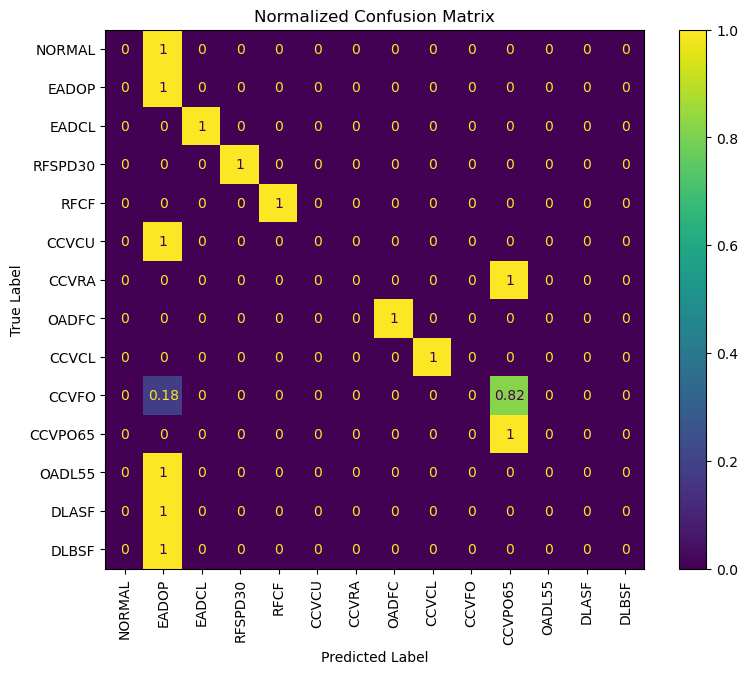


Confusion Matrix: 
 None

Accuracy : 
 48.316326530612244

Report :
                precision    recall  f1-score   support

           0       0.00      0.00      0.00       139
           1       0.14      1.00      0.25       124
           2       1.00      1.00      1.00       139
           3       1.00      1.00      1.00       141
           4       1.00      1.00      1.00       126
           5       0.00      0.00      0.00       138
           6       0.00      0.00      0.00       150
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00       139
           9       0.00      0.00      0.00       139
          10       0.34      1.00      0.51       138
          11       0.00      0.00      0.00       166
          12       0.00      0.00      0.00       152
          13       0.00      0.00      0.00       129

    accuracy                           0.48      1960
   macro avg       0.39      0.50      0.41      1960
weighted 

In [7]:
# Driver code
def main():


    clf_gini = train_using_gini(x_train, x_test, y_train)


    # Operational Phase
    print("\nResults Using Gini Index:")

    # Prediction using gini
    y_pred = prediction(x_test, clf_gini)
    cal_accuracy(y_test, y_pred)


    visualize_tree(clf_gini)




# Calling main function
if __name__=="__main__":
    main()

In [8]:
!pip install xgboost

# XGBoost

In [9]:
import xgboost as xgb

In [10]:
model_xgb = xgb.XGBClassifier()

model_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

[ 1  0 11 ...  9  7 11]


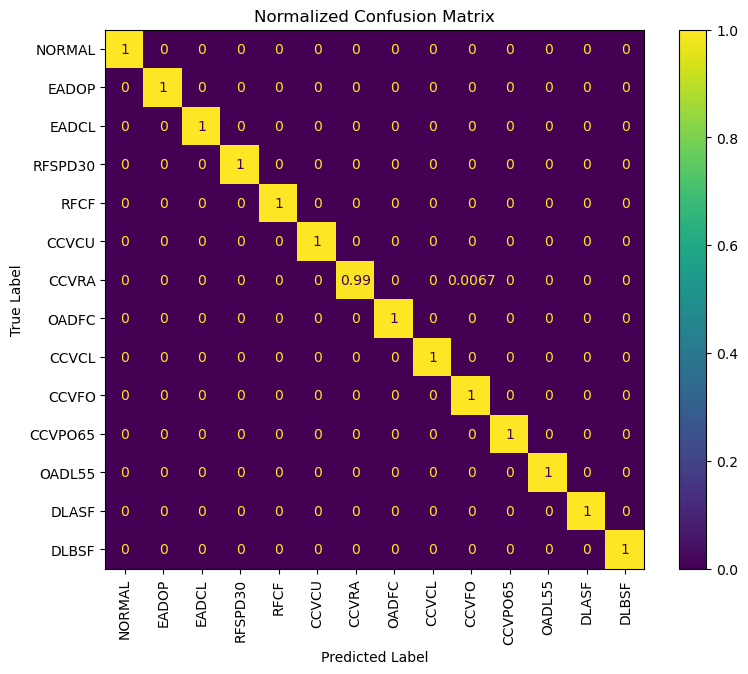


Confusion Matrix: 
 None

Accuracy : 
 99.94897959183675

Report :
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       139
           3       1.00      1.00      1.00       141
           4       1.00      1.00      1.00       126
           5       1.00      1.00      1.00       138
           6       1.00      0.99      1.00       150
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00       139
           9       0.99      1.00      1.00       139
          10       1.00      1.00      1.00       138
          11       1.00      1.00      1.00       166
          12       1.00      1.00      1.00       152
          13       1.00      1.00      1.00       129

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted a

In [11]:
y_pred_xgb = model_xgb.predict(x_test)
print(y_pred_xgb)
cal_accuracy(y_test, y_pred_xgb)

# Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

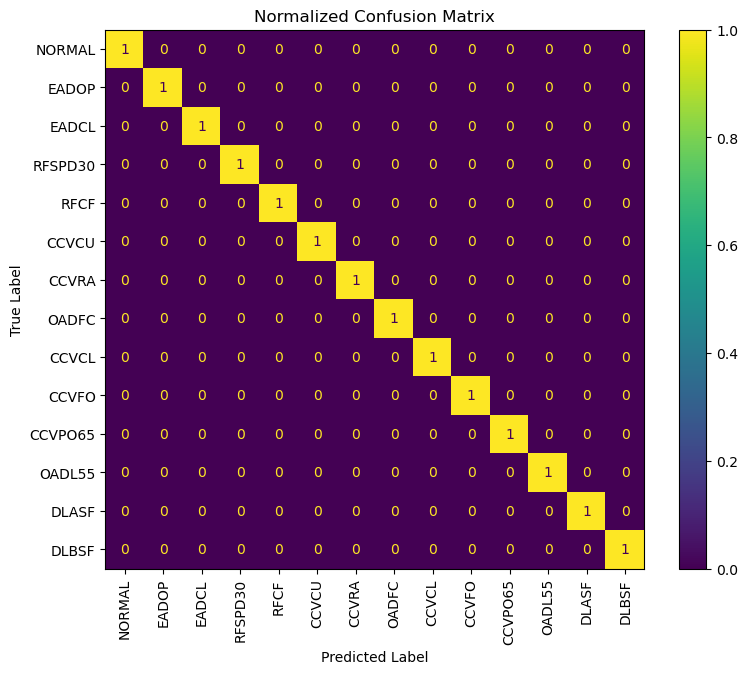


Confusion Matrix: 
 None

Accuracy : 
 100.0

Report :
                precision    recall  f1-score   support

           0       1.00      1.00      1.00       139
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       139
           3       1.00      1.00      1.00       141
           4       1.00      1.00      1.00       126
           5       1.00      1.00      1.00       138
           6       1.00      1.00      1.00       150
           7       1.00      1.00      1.00       140
           8       1.00      1.00      1.00       139
           9       1.00      1.00      1.00       139
          10       1.00      1.00      1.00       138
          11       1.00      1.00      1.00       166
          12       1.00      1.00      1.00       152
          13       1.00      1.00      1.00       129

    accuracy                           1.00      1960
   macro avg       1.00      1.00      1.00      1960
weighted avg       1.0

In [13]:
model_rf.fit(x_train, y_train)
y_pred_rf = model_rf.predict(x_test)
cal_accuracy(y_test, y_pred_rf)

# Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train, y_train)

GaussianNB()

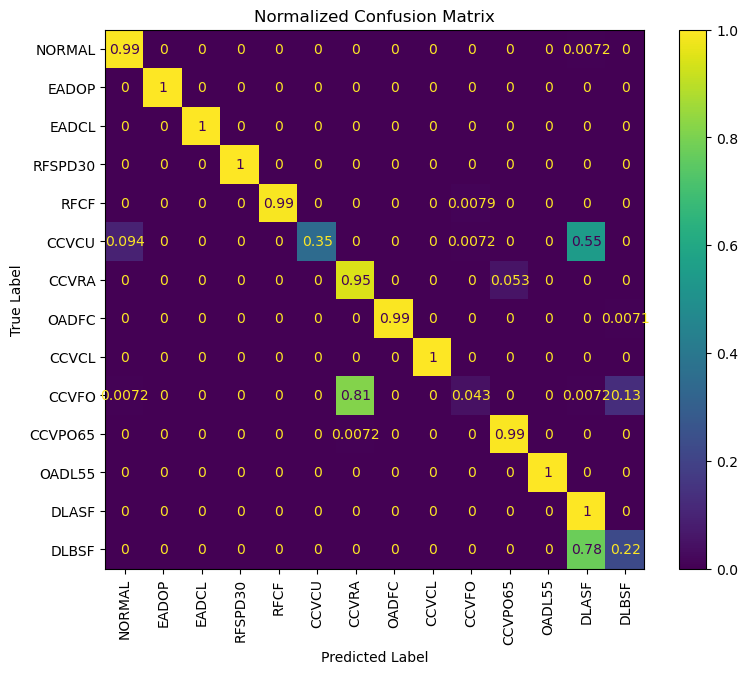


Confusion Matrix: 
 None

Accuracy : 
 82.90816326530613

Report :
                precision    recall  f1-score   support

           0       0.91      0.99      0.95       139
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       139
           3       1.00      1.00      1.00       141
           4       1.00      0.99      1.00       126
           5       1.00      0.35      0.52       138
           6       0.55      0.95      0.70       150
           7       1.00      0.99      1.00       140
           8       1.00      1.00      1.00       139
           9       0.75      0.04      0.08       139
          10       0.94      0.99      0.97       138
          11       1.00      1.00      1.00       166
          12       0.46      1.00      0.63       152
          13       0.60      0.22      0.33       129

    accuracy                           0.83      1960
   macro avg       0.87      0.82      0.80      1960
weighted a

In [15]:
y_pred_nb  =  model_nb.predict(x_test)
cal_accuracy(y_test, y_pred_nb)

# KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model_knn = KNeighborsClassifier()

model_knn.fit(x_train, y_train)

KNeighborsClassifier()

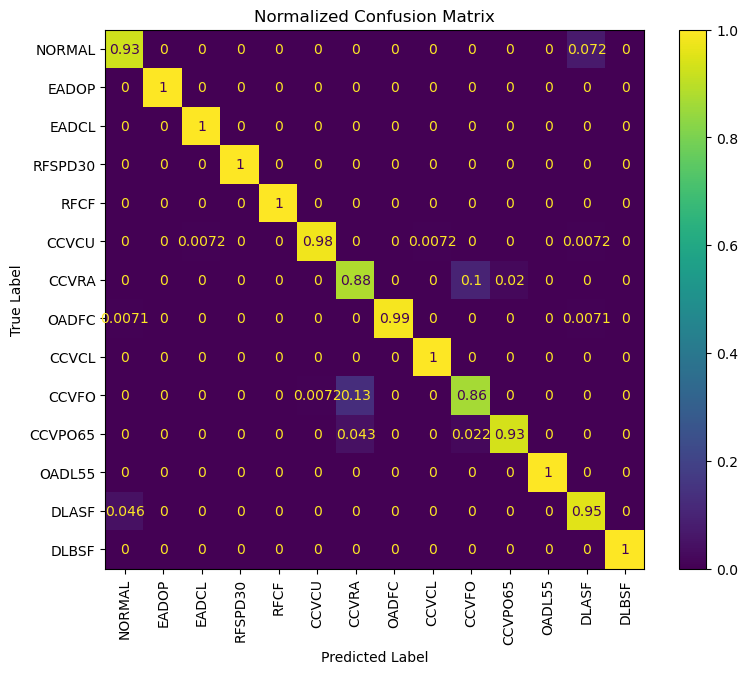


Confusion Matrix: 
 None

Accuracy : 
 96.53061224489797

Report :
                precision    recall  f1-score   support

           0       0.94      0.93      0.93       139
           1       1.00      1.00      1.00       124
           2       0.99      1.00      1.00       139
           3       1.00      1.00      1.00       141
           4       1.00      1.00      1.00       126
           5       0.99      0.98      0.99       138
           6       0.85      0.88      0.86       150
           7       1.00      0.99      0.99       140
           8       0.99      1.00      1.00       139
           9       0.87      0.86      0.87       139
          10       0.98      0.93      0.96       138
          11       1.00      1.00      1.00       166
          12       0.92      0.95      0.94       152
          13       1.00      1.00      1.00       129

    accuracy                           0.97      1960
   macro avg       0.97      0.97      0.97      1960
weighted a

In [18]:
y_pred_knn =  model_knn.predict(x_test)
cal_accuracy(y_test, y_pred_knn)

# CatBoost

In [19]:
!pip install catboost

In [20]:
import catboost
from catboost import CatBoostClassifier

In [21]:
model_cat = CatBoostClassifier(
    iterations=10,
    learning_rate=0.1, depth = 13
    #loss_function='CrossEntropy'
)


model_cat.fit(x_train, y_train,

        eval_set=(x_test, y_test),
        verbose=False
)

print('CatBoost model is fitted: ' + str(model_cat.is_fitted()))
print('CatBoost model parameters:')
print(model_cat.get_params())

CatBoost model is fitted: True
CatBoost model parameters:
{'iterations': 10, 'learning_rate': 0.1, 'depth': 13}


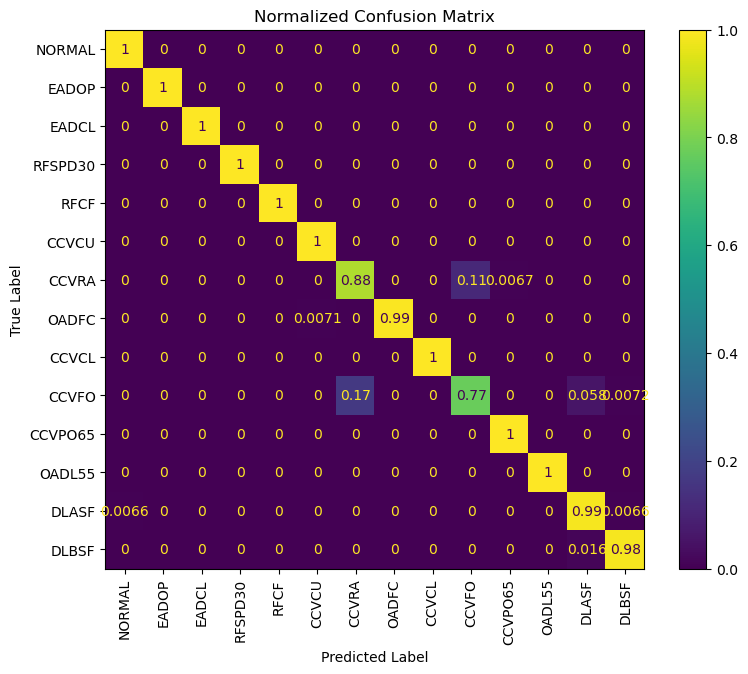


Confusion Matrix: 
 None

Accuracy : 
 97.1938775510204

Report :
                precision    recall  f1-score   support

           0       0.99      1.00      1.00       139
           1       1.00      1.00      1.00       124
           2       1.00      1.00      1.00       139
           3       1.00      1.00      1.00       141
           4       1.00      1.00      1.00       126
           5       0.99      1.00      1.00       138
           6       0.85      0.88      0.87       150
           7       1.00      0.99      1.00       140
           8       1.00      1.00      1.00       139
           9       0.86      0.77      0.81       139
          10       0.99      1.00      1.00       138
          11       1.00      1.00      1.00       166
          12       0.94      0.99      0.96       152
          13       0.98      0.98      0.98       129

    accuracy                           0.97      1960
   macro avg       0.97      0.97      0.97      1960
weighted av

In [22]:
y_pred_cat = model_cat.predict(x_test)
cal_accuracy(y_test, y_pred_cat)

# Lightgbm

In [23]:
!pip install lightgbm

In [24]:
import lightgbm as lgb

In [25]:
y_pred_lgb = model_lgb.predict(x_test)
cal_accuracy(y_test, y_pred_lgb)

NameError: name 'model_lgb' is not defined